# Step 1. Environment Setting

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 4.1
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# 4.2
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

INPUT_DIR = "../kaggle/input/house_prices/"
OUTPUT_DIR = "../kaggle/output/house_prices/"

import os
for dirname, _, filenames in os.walk(INPUT_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_df = pd.read_csv(INPUT_DIR + "train.csv")
test_df = pd.read_csv(INPUT_DIR + "test.csv")


all_column = ['MSSubClass','MSZoning','LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition']
label_column = ["SalePrice"]

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../kaggle/input/house_prices/data_description.txt
../kaggle/input/house_prices/sample_submission.csv
../kaggle/input/house_prices/test.csv
../kaggle/input/house_prices/train.csv
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQua

# Attemp. Feature Enginnering

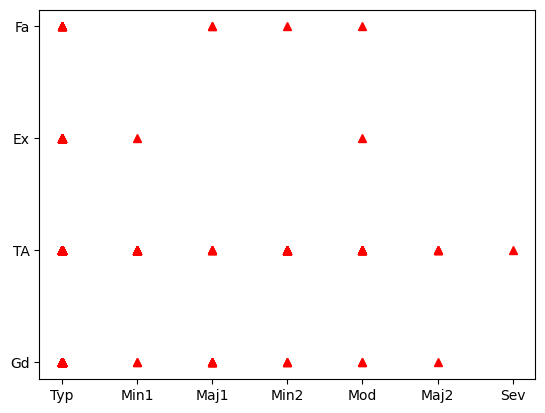

In [19]:
# print(train_df.columns.values)
train_df.head()
plt.plot(train_df['ExterQual'], train_df['SalePrice'], 'r^')
plt.show()

# Step 2. Debug CSV Data

## 2-1. TOP Visualizations

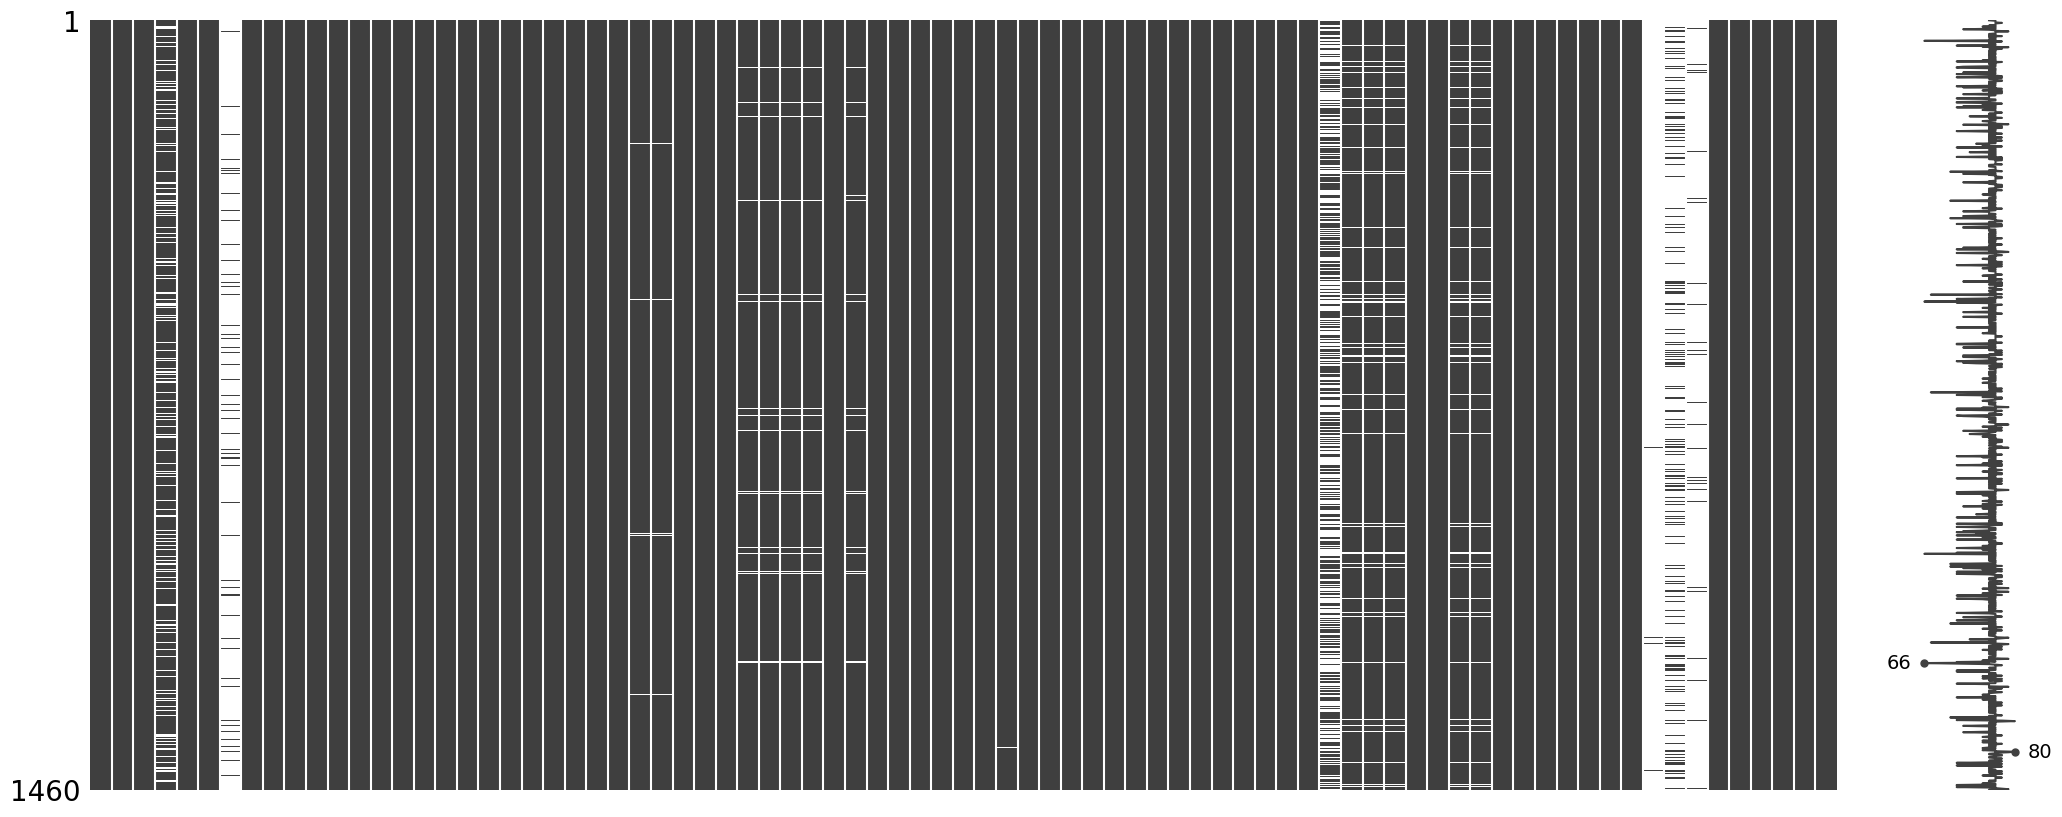

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

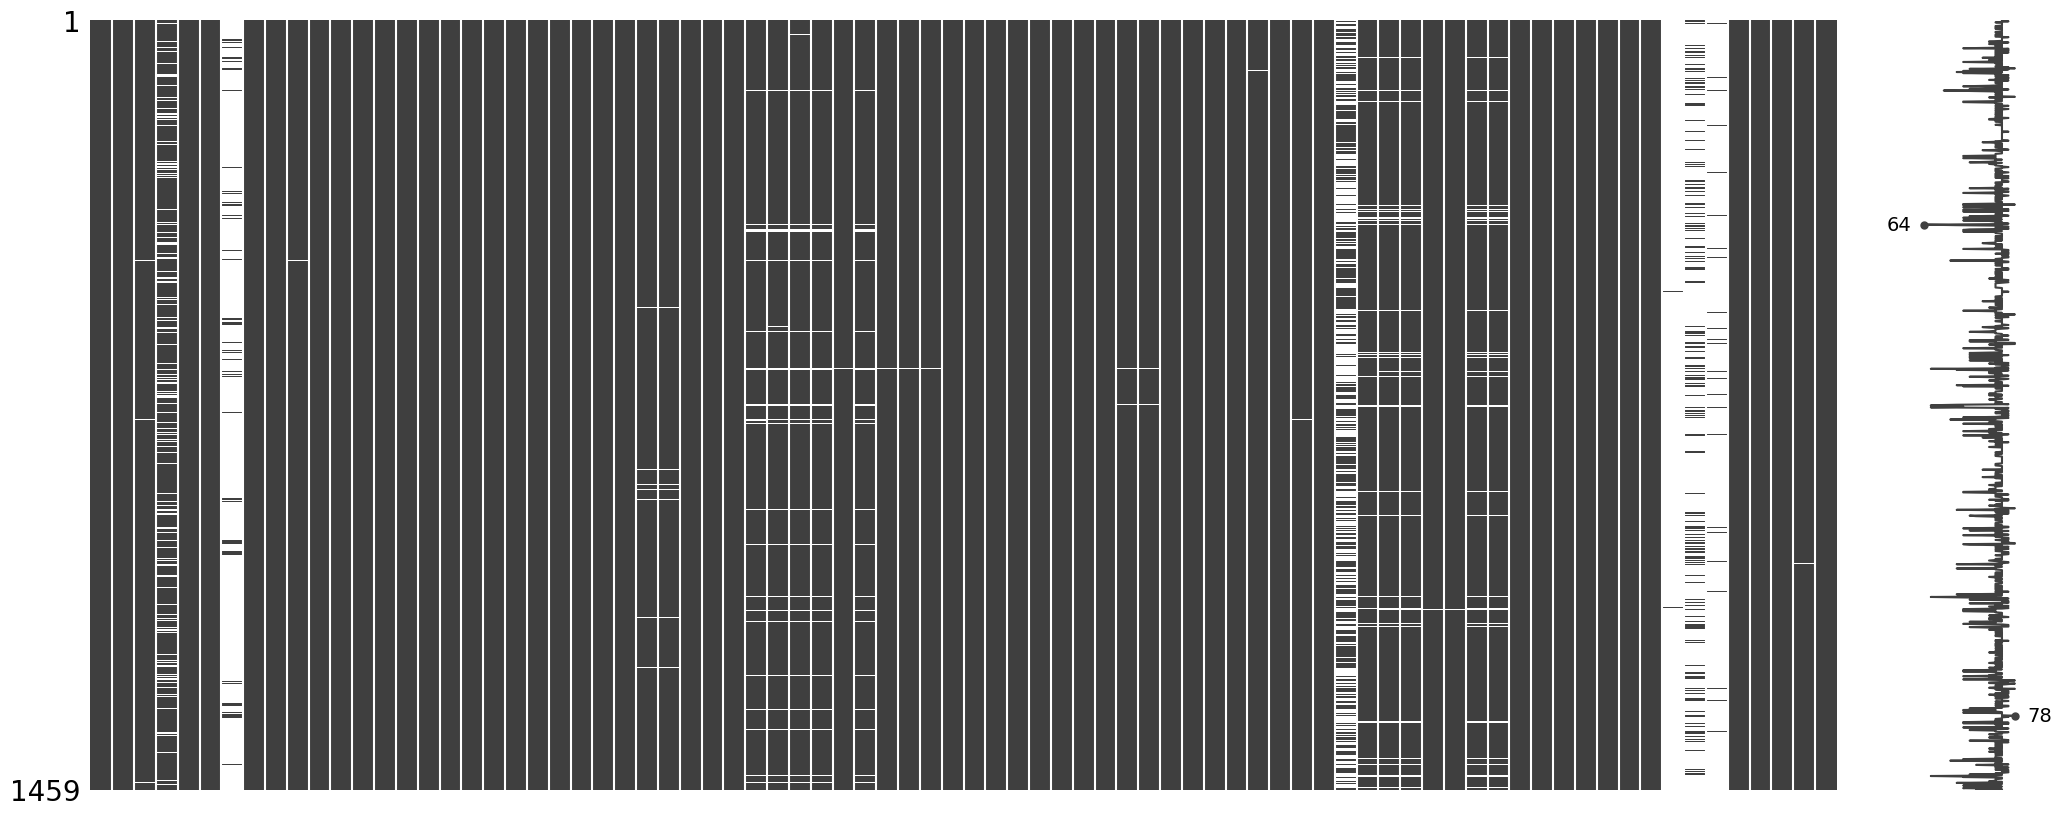

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [2]:
msno.matrix(train_df)
plt.show()
train_df.info()
train_df.isnull().sum()

msno.matrix(test_df)
plt.show()
test_df.info()
test_df.isnull().sum()

## 2-2. Some Visualizations

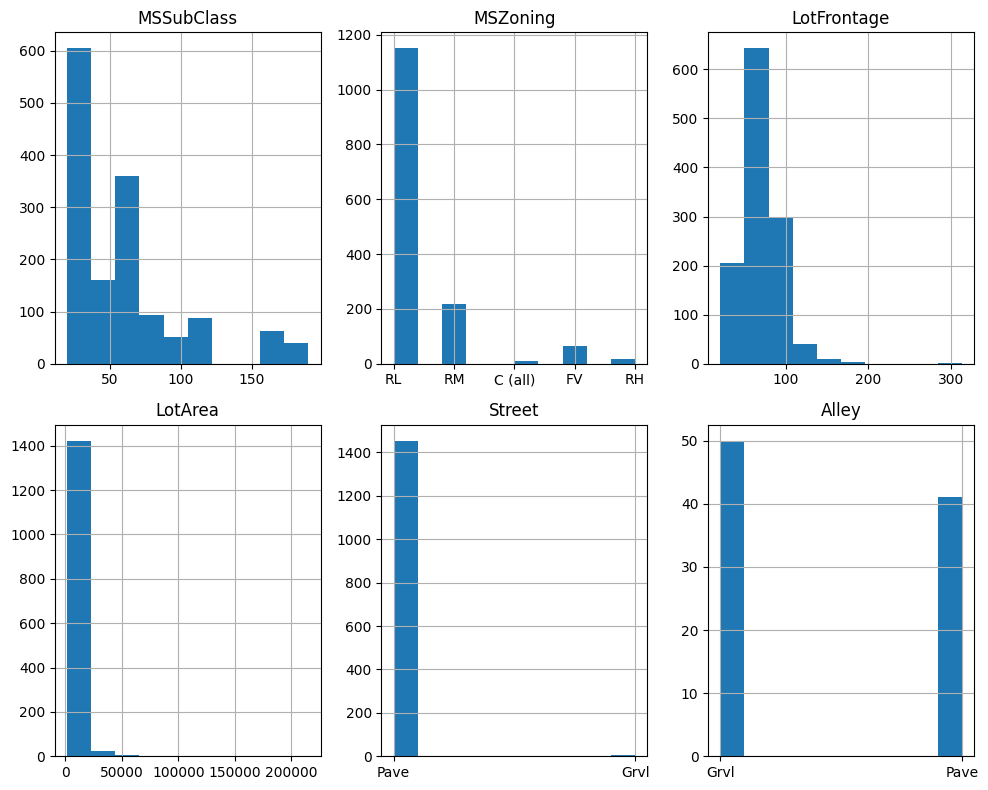

In [7]:
plt.figure(figsize=(10,8))

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.title(str(all_column[i]))
    train_df[str(all_column[i])].hist()

plt.tight_layout()
plt.show()

# Step 3. Data Processing

## 3-1. feature engineering [1]
1. Missing Value Check
2. Missing Value Replace
3. 부호화
4. Result Value Check

In [21]:
for i in range(len(all_column)):
    print(train_df[all_column[i]][0], type(train_df[all_column[i]][0]))
    # # Missing Value Check
    # print('#', i, 'th counts of missing value (train) =>', train_df[all_column[i]].isnull().sum())
    # print(train_df[all_column[i]].value_counts())
    # print('-------------------------------------')
    # print('#', i, 'th counts of missing value (test) =>', test_df[all_column[i]].isnull().sum())
    # print(test_df[all_column[i]].value_counts())
    # print('-------------------------------------')

    # # Missing Value Replace
    # train_df[all_column[i]].fillna('S', inplace=True)

    # One-Hot Encoding

# # 3.1.2 Missing Value Replace
# train_df['Embarked'].fillna('S', inplace=True)

# # 3.1.3 One-Hot Encoding
# embarked_mapping = {'S':1, 'C':2, 'Q':3}
# train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping).astype(int)
# test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping).astype(int)

# # 3.1.4 Result Value Check
# print('counts of missing value (train) =>', train_df['Embarked'].isnull().sum())
# print('-------------------------------------')
# print(train_df['Embarked'].value_counts())
# print('-------------------------------------')
# print('counts of missing value (train) =>', test_df['Embarked'].isnull().sum())
# print('-------------------------------------')
# print(test_df['Embarked'].value_counts())
# print('-------------------------------------')

60 <class 'numpy.int64'>
RL <class 'str'>
65.0 <class 'numpy.float64'>
8450 <class 'numpy.int64'>
Pave <class 'str'>
nan <class 'float'>
Reg <class 'str'>
Lvl <class 'str'>
AllPub <class 'str'>
Inside <class 'str'>
Gtl <class 'str'>
CollgCr <class 'str'>
Norm <class 'str'>
Norm <class 'str'>
1Fam <class 'str'>
2Story <class 'str'>
7 <class 'numpy.int64'>
5 <class 'numpy.int64'>
2003 <class 'numpy.int64'>
2003 <class 'numpy.int64'>
Gable <class 'str'>
CompShg <class 'str'>
VinylSd <class 'str'>
VinylSd <class 'str'>
BrkFace <class 'str'>
196.0 <class 'numpy.float64'>
Gd <class 'str'>
TA <class 'str'>
PConc <class 'str'>
Gd <class 'str'>
TA <class 'str'>
No <class 'str'>
GLQ <class 'str'>
706 <class 'numpy.int64'>
Unf <class 'str'>
0 <class 'numpy.int64'>
150 <class 'numpy.int64'>
856 <class 'numpy.int64'>
GasA <class 'str'>
Ex <class 'str'>
Y <class 'str'>
SBrkr <class 'str'>
856 <class 'numpy.int64'>
854 <class 'numpy.int64'>
0 <class 'numpy.int64'>
1710 <class 'numpy.int64'>
1 <class 

## 3-2. feature engineering ('Name' column --> 'Title' column)
1. Missing Value Check
2. Make Title Column
3. Missing Value Check
4. Value Replace
5. One-Hot Encoding
6. Result Value Check

counts of missing value (train) => 0
counts of missing value (Test) => 0
-------------------------------------
counts of missing value (train) => 0
counts of missing value (Test) => 0
-------------------------------------
counts of missing value (train) => 0
-------------------------------------
1    518
2    185
3    126
4     40
5     15
6      7
Name: Title, dtype: int64
-------------------------------------
counts of missing value (Test) => 0
-------------------------------------
1    240
2     79
3     73
4     21
5      3
6      2
Name: Title, dtype: int64
-------------------------------------


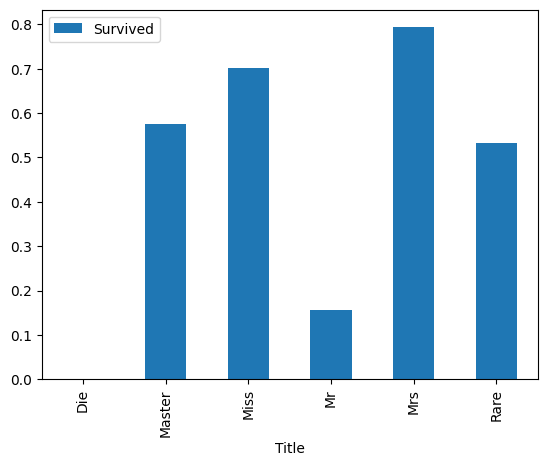

In [42]:
# 3.2.1 Missing Value Check
print('counts of missing value (train) =>', train_df['Name'].isnull().sum())
print('counts of missing value (Test) =>', test_df['Name'].isnull().sum())
print('-------------------------------------')

# 3.2.2 Make Title Column
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract('([A-Za-z]+)\.', expand=False)

# 3.2.3 Missing Value Check
print('counts of missing value (train) =>', train_df['Title'].isnull().sum())
print('counts of missing value (Test) =>', test_df['Title'].isnull().sum())
print('-------------------------------------')
# pd.crosstab(train_df['Title'], train_df['Sex'])
# print(test_df['Title'].value_counts())
# pd.crosstab(test_df['Title'], test_df['Sex'])

# 3.2.4 Value Replace
train_df['Title'] = train_df['Title'].replace(['Mlle','Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme','Dona'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Don'], 'Mr')
train_df['Title'] = train_df['Title'].replace(['Col','Countess','Dr','Jonkheer','Lady','Major','Sir'], 'Rare')
train_df['Title'] = train_df['Title'].replace(['Capt','Rev'], 'Die')

test_df['Title'] = test_df['Title'].replace(['Mlle','Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Mme','Dona'], 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Don'], 'Mr')
test_df['Title'] = test_df['Title'].replace(['Col','Countess','Dr','Jonkheer','Lady','Major','Sir'], 'Rare')
test_df['Title'] = test_df['Title'].replace(['Capt','Rev'], 'Die')

title_survived = train_df.groupby('Title', as_index=False)['Survived'].mean()
title_survived.plot('Title', kind='bar',).set_xlabel('Title')

# 3.2.5 One-Hot Encoding
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5, 'Die':6}
train_df['Title'] = train_df['Title'].map(title_mapping).astype(int)
test_df['Title'] = test_df['Title'].map(title_mapping).astype(int)

# 3.2.6 Result Value Check
print('counts of missing value (train) =>', train_df['Title'].isnull().sum())
print('-------------------------------------')
print(train_df['Title'].value_counts())
print('-------------------------------------')
print('counts of missing value (Test) =>', test_df['Title'].isnull().sum())
print('-------------------------------------')
print(test_df['Title'].value_counts())
print('-------------------------------------')

## 3-3. feature engineering ('Sex' column)
1. Missing Value Check
2. 부호화
3. Result Value Check

In [43]:
# 3.3.1 Missing Value Check
print('counts of missing value (train) =>', train_df['Sex'].isnull().sum())
print('-------------------------------------')
print(train_df['Sex'].value_counts())
print('-------------------------------------')
print('counts of missing value (test) =>', test_df['Sex'].isnull().sum())
print('-------------------------------------')
print(test_df['Sex'].value_counts())
print('-------------------------------------')

# 3.3.2 One-Hot Encoding
sex_mapping = {'male':1, 'female':2}
train_df['Sex'] = train_df['Sex'].map(sex_mapping).astype(int)
test_df['Sex'] = test_df['Sex'].map(sex_mapping).astype(int)

# 3.3.3 Result Value Check
print('counts of missing value (train) =>', train_df['Sex'].isnull().sum())
print('-------------------------------------')
print(train_df['Sex'].value_counts())
print('-------------------------------------')
print('counts of missing value (test) =>', test_df['Sex'].isnull().sum())
print('-------------------------------------')
print(test_df['Sex'].value_counts())
print('-------------------------------------')


counts of missing value (train) => 0
-------------------------------------
male      577
female    314
Name: Sex, dtype: int64
-------------------------------------
counts of missing value (test) => 0
-------------------------------------
male      266
female    152
Name: Sex, dtype: int64
-------------------------------------
counts of missing value (train) => 0
-------------------------------------
1    577
2    314
Name: Sex, dtype: int64
-------------------------------------
counts of missing value (test) => 0
-------------------------------------
1    266
2    152
Name: Sex, dtype: int64
-------------------------------------


## 3-4. feature engineering ('Age' column)
1. Missing Value Check
2. Missing Value Replace
3. 부호화 (정수화)

In [44]:
# 3.4.1 Missing Value Check
print('counts of missing value (train) =>', train_df['Age'].isnull().sum())
print('-------------------------------------')
print(train_df['Age'].value_counts())
print('-------------------------------------')
print('counts of missing value (test) =>', test_df['Age'].isnull().sum())
print('-------------------------------------')
print(test_df['Age'].value_counts())
print('-------------------------------------')

# 3.4.2 Missing Value Replace 최적화
train_df.groupby('Title')['Age'].median()
test_df.groupby('Title')['Age'].median()

train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform('median'), inplace=True)
test_df['Age'].fillna(test_df.groupby('Title')['Age'].transform('median'), inplace=True)

# 3.4.3 정수화
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

counts of missing value (train) => 177
-------------------------------------
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64
-------------------------------------
counts of missing value (test) => 86
-------------------------------------
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64
-------------------------------------


## 3-5. feature engineering ('Age' column -> 'Ageband' column)
1. Make Ageband column

In [45]:
# 3.5.1 Make Ageband column
# train_df['AgeBand'] = pd.cut(train_df['Age'], 8)
# train_df.groupby('AgeBand', as_index=False)['Survived'].mean().sort_values(by = "AgeBand", ascending = True).plot(kind='bar',)
# train_df.groupby('AgeBand', as_index=False)['Survived'].mean().sort_values(by = "AgeBand", ascending = True)

train_df.loc[                         (train_df['Age'] <= 5 ), "AgeBand"] = 0
train_df.loc[(train_df['Age'] > 5 ) & (train_df['Age'] <= 10), "AgeBand"] = 1
train_df.loc[(train_df['Age'] > 10) & (train_df['Age'] <= 15), "AgeBand"] = 2
train_df.loc[(train_df['Age'] > 15) & (train_df['Age'] <= 20), "AgeBand"] = 3
train_df.loc[(train_df['Age'] > 20) & (train_df['Age'] <= 25), "AgeBand"] = 4
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 30), "AgeBand"] = 5
train_df.loc[(train_df['Age'] > 30) & (train_df['Age'] <= 35), "AgeBand"] = 6
train_df.loc[(train_df['Age'] > 35) & (train_df['Age'] <= 40), "AgeBand"] = 7
train_df.loc[(train_df['Age'] > 40) & (train_df['Age'] <= 45), "AgeBand"] = 8
train_df.loc[(train_df['Age'] > 45) & (train_df['Age'] <= 50), "AgeBand"] = 9
train_df.loc[(train_df['Age'] > 50) & (train_df['Age'] <= 55), "AgeBand"] = 10
train_df.loc[(train_df['Age'] > 55) & (train_df['Age'] <= 60), "AgeBand"] = 11
train_df.loc[(train_df['Age'] > 60) & (train_df['Age'] <= 65), "AgeBand"] = 12
train_df.loc[(train_df['Age'] > 65) & (train_df['Age'] <= 70), "AgeBand"] = 13
train_df.loc[(train_df['Age'] > 70) & (train_df['Age'] <= 75), "AgeBand"] = 14
train_df.loc[(train_df['Age'] > 75)                          , "AgeBand"] = 15

test_df.loc[                        (test_df['Age'] <= 5 ), "AgeBand"] = 0
test_df.loc[(test_df['Age'] > 5 ) & (test_df['Age'] <= 10), "AgeBand"] = 1
test_df.loc[(test_df['Age'] > 10) & (test_df['Age'] <= 15), "AgeBand"] = 2
test_df.loc[(test_df['Age'] > 15) & (test_df['Age'] <= 20), "AgeBand"] = 3
test_df.loc[(test_df['Age'] > 20) & (test_df['Age'] <= 25), "AgeBand"] = 4
test_df.loc[(test_df['Age'] > 25) & (test_df['Age'] <= 30), "AgeBand"] = 5
test_df.loc[(test_df['Age'] > 30) & (test_df['Age'] <= 35), "AgeBand"] = 6
test_df.loc[(test_df['Age'] > 35) & (test_df['Age'] <= 40), "AgeBand"] = 7
test_df.loc[(test_df['Age'] > 40) & (test_df['Age'] <= 45), "AgeBand"] = 8
test_df.loc[(test_df['Age'] > 45) & (test_df['Age'] <= 50), "AgeBand"] = 9
test_df.loc[(test_df['Age'] > 50) & (test_df['Age'] <= 55), "AgeBand"] = 10
test_df.loc[(test_df['Age'] > 55) & (test_df['Age'] <= 60), "AgeBand"] = 11
test_df.loc[(test_df['Age'] > 60) & (test_df['Age'] <= 65), "AgeBand"] = 12
test_df.loc[(test_df['Age'] > 65) & (test_df['Age'] <= 70), "AgeBand"] = 13
test_df.loc[(test_df['Age'] > 70) & (test_df['Age'] <= 75), "AgeBand"] = 14
test_df.loc[(test_df['Age'] > 75)                         , "AgeBand"] = 15

print(train_df['AgeBand'].value_counts())
print(test_df['AgeBand'].value_counts())

train_df['AgeBand'] = train_df['AgeBand'].astype(int)
test_df['AgeBand'] = test_df['AgeBand'].astype(int)

5.0     229
4.0     157
6.0     103
3.0      97
7.0      69
0.0      48
8.0      47
9.0      38
10.0     25
1.0      20
2.0      19
11.0     17
12.0     14
13.0      4
14.0      3
15.0      1
Name: AgeBand, dtype: int64
5.0     115
4.0      88
7.0      39
3.0      37
6.0      27
8.0      24
9.0      21
1.0      14
10.0     12
0.0      12
2.0      10
11.0      9
12.0      8
13.0      1
15.0      1
Name: AgeBand, dtype: int64


## 3-6. feature engineering ('SibSp', 'Parch' column -> 'Family', 'Alone column)
1. Missing Value Check
2. Make Family column
3. Make Alone colume

counts of missing value (train) => 0
counts of missing value (train) => 0
-------------------------------------
counts of missing value (test) => 0
counts of missing value (test) => 0
-------------------------------------
   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000
-------------------------------------
   Alone  Survived
0      0  0.505650
1      1  0.303538
-------------------------------------


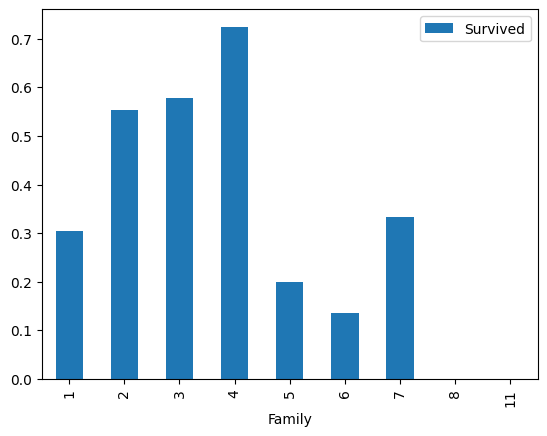

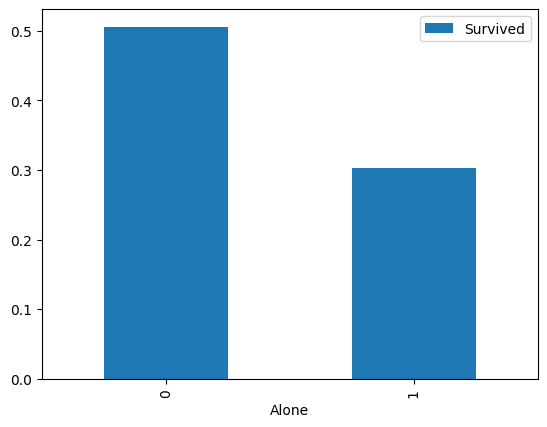

In [46]:
# 3.6.1 Missing Value Check
print('counts of missing value (train) =>', train_df['SibSp'].isnull().sum())
print('counts of missing value (train) =>', train_df['Parch'].isnull().sum())
print('-------------------------------------')
print('counts of missing value (test) =>', test_df['SibSp'].isnull().sum())
print('counts of missing value (test) =>', test_df['Parch'].isnull().sum())
print('-------------------------------------')

# 3.6.2 Make Family column
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df.groupby('Family', as_index=False)['Survived'].mean().sort_values(by='Family').plot('Family', kind='bar',)
print(train_df.groupby('Family', as_index=False)['Survived'].mean().sort_values(by='Family'))
print('-------------------------------------')

# 3.6.3 Make Alone colume
train_df['Alone'] = 0
train_df.loc[train_df['Family'] == 1, 'Alone'] = 1
test_df['Alone'] = 0
test_df.loc[test_df['Family'] == 1, 'Alone'] = 1

train_df.groupby('Alone', as_index=False)['Survived'].mean().sort_values(by='Alone').plot('Alone', kind='bar',)
print(train_df.groupby('Alone', as_index=False)['Survived'].mean().sort_values(by='Alone'))
print('-------------------------------------')

## 3-7. feature engineering ('Fare' column -> 'FareBand' Column)
1. Missing Value Check
2. Make Family column
3. Make Alone colume

counts of missing value (train) => 0
-------------------------------------
counts of missing value (test) => 1
-------------------------------------
  FareBand  Survived
0        0  0.217877
1        1  0.201087
2        2  0.424419
3        3  0.444444
4        4  0.642045


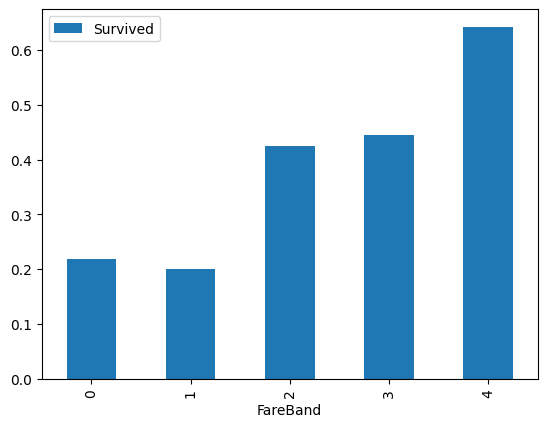

In [47]:
# 3.7.1 Missing Value Check
print('counts of missing value (train) =>', train_df['Fare'].isnull().sum())
print('-------------------------------------')
print('counts of missing value (test) =>', test_df['Fare'].isnull().sum())
print('-------------------------------------')

# 3.7.2 결측치 처리
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

# 3.7.3 Make FareBand Column
train_df["FareBand"] = pd.qcut(train_df['Fare'], q=5, labels=[0,1,2,3,4])
train_df.groupby('FareBand', as_index=False)['Survived'].mean().sort_values(by='FareBand', ascending=True).plot('FareBand', kind='bar',)
print(train_df.groupby('FareBand', as_index=False)['Survived'].mean().sort_values(by='FareBand'))

test_df.loc[                             (test_df['Fare'] <=  7.854), "FareBand"] = 0
test_df.loc[(test_df['Fare'] >  7.854) & (test_df['Fare'] <= 10.500), "FareBand"] = 1
test_df.loc[(test_df['Fare'] > 10.500) & (test_df['Fare'] <= 21.679), "FareBand"] = 2
test_df.loc[(test_df['Fare'] > 21.679) & (test_df['Fare'] <= 39.688), "FareBand"] = 3
test_df.loc[(test_df['Fare'] > 39.688)                              , "FareBand"] = 4

train_df['FareBand'] = train_df['FareBand'].astype(int)
test_df['FareBand'] = test_df['FareBand'].astype(int)

In [48]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,Family,Alone,FareBand
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,NaN,3,1,6,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47,1,0,363272,7.0000,NaN,1,3,9,2,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,NaN,3,1,12,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,NaN,1,1,5,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22,1,1,3101298,12.2875,NaN,1,3,4,3,0,2


In [49]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,Family,Alone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,1,1,4,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38,1,0,PC 17599,71.2833,C85,2,3,7,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",2,26,0,0,STON/O2. 3101282,7.9250,NaN,1,2,5,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35,1,0,113803,53.1000,C123,1,3,6,2,0,4
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,1,1,6,1,1,1


# 4. Prediction

## 4.1 Random Forest

In [50]:
y = train_df["Survived"]

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title", "AgeBand", "Family", "Alone", "FareBand"]
X = pd.get_dummies(train_df[features])

# Split into validation and training data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

# Define a random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(train_X, train_y)
predictions = model.predict(test_X)
mae = mean_absolute_error(predictions, test_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(mae))

# Step 5. Model Training
# To improve accuracy, create a new Random Forest model which you will train on all training data
model_on_full_data = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# fit rf_model_on_full_data on all data from the training data
model_on_full_data.fit(X, y)

# Step 6. Prediction
pre_X = pd.get_dummies(test_df[features])
prediction = model_on_full_data.predict(pre_X)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': prediction})
output.to_csv(OUTPUT_DIR + 'submission_ramdomforest.csv', index=False)

Validation MAE for Random Forest Model: 0


## 4.2 Deep Learning

In [52]:
# 4.2.1 딥러닝 학습을 위한 입력데이터 feature / 정답데이터 label 분리
label_column = ["Survived"]
feature_column = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Title", "AgeBand", "Family", "Alone", "FareBand"]

train_label_df = train_df[label_column]
train_feature_df = train_df[feature_column]
test_feature_df = test_df[feature_column]

print('train shape = ', train_feature_df.shape, ', test shape = ', test_feature_df.shape)

# 4.2.2 표준화 (Standardization)
scaler = StandardScaler()

train_feature_df_scaled = scaler.fit_transform(train_feature_df[feature_column]) # return : numpy
train_feature_df_scaled = pd.DataFrame(train_feature_df_scaled, columns=feature_column)
test_feature_df_scaled = scaler.fit_transform(test_feature_df[feature_column]) # return : numpy
test_feature_df_scaled = pd.DataFrame(test_feature_df_scaled, columns=feature_column)

train_feature_df_scaled.head(2)

# 4.2.3 Building Model
x_train = train_feature_df_scaled.to_numpy().astype('float32')
x_test = test_feature_df_scaled.to_numpy().astype('float32')
y_train = train_label_df.to_numpy().astype('float32')

#64개의 노드를 가지는 1개의 Dense 레이어와 Dropout 레이어 구성
# Dense(sigmoid) -> Drop out(64), Dense(softmax)
kaggle_titanic_ann_model = Sequential()
kaggle_titanic_ann_model.add(Dense(128, activation='sigmoid', input_shape=(x_train.shape[1],)))
kaggle_titanic_ann_model.add(Dropout(0.1))
kaggle_titanic_ann_model.add(Dense(2, activation='softmax'))

# 모델 제작
kaggle_titanic_ann_model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 fit
hist = kaggle_titanic_ann_model.fit(x_train, y_train, epochs=200)

# 결과 추론
survived_prediction = kaggle_titanic_ann_model.predict(x_test)
survived_prediction_digit = np.argmax(survived_prediction, axis=1)
gender_df = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived':survived_prediction_digit})
gender_df.to_csv(OUTPUT_DIR + 'Kaggle_Titanic_Competition_2.csv', index=False)



train shape =  (891, 12) , test shape =  (418, 12)
Epoch 1/200
28/28 [==============================] - 0s 1ms/step - loss: 0.7112 - accuracy: 0.5297
Epoch 2/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.6105
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6502 - accuracy: 0.6352
Epoch 4/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6611
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6057 - accuracy: 0.6756
Epoch 6/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5856 - accuracy: 0.7295
Epoch 7/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.7239
Epoch 8/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7093
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 0.5602 - accuracy: 0.7250
Epoch 10/200
28/28 [==============================] - 0s 1